In [1]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import matplotlib

In [2]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=15)  # legend fontsize

In [3]:
types = ['small', 'med', 'big']

for domain in ['intervals', 'zonos', 'pasados']:
    print(f'{domain} runtimes:')

    small = torch.load(f'results/time_{domain}_convsmall.pth')
    med = torch.load(f'results/time_{domain}_convmed.pth')
    big = torch.load(f'results/time_{domain}_convbig.pth')

    print(f'ConvSmall: {sum(small) / len(small)}s')
    print(f'ConvMed: {sum(med) / len(med)}s')
    print(f'ConvBig: {sum(big) / len(big)}s')
    print()

intervals runtimes:
ConvSmall: 3.3770150808990005s
ConvMed: 5.106067412011326s
ConvBig: 115.32500009490798s

zonos runtimes:
ConvSmall: 3.6373802650471525s
ConvMed: 5.700746505384644s
ConvBig: 212.20994942278912s

pasados runtimes:
ConvSmall: 4.6972532399867974s
ConvMed: 7.265473416671156s
ConvBig: 190.71775136274596s


ConvSmall network zono/interval Lipschitz constant difference: 1517317.1494487273
ConvSmall network Pasado/zono Lipschitz constant difference: 609067.1015582235

ConvMed network zono/interval Lipschitz constant difference: 4785335.80732524
ConvMed network Pasado/zono Lipschitz constant difference: 2708136.609393341

ConvBig network zono/interval Lipschitz constant difference: 629277773841.5938
ConvBig network Pasado/zono Lipschitz constant difference: 198622539727.80322


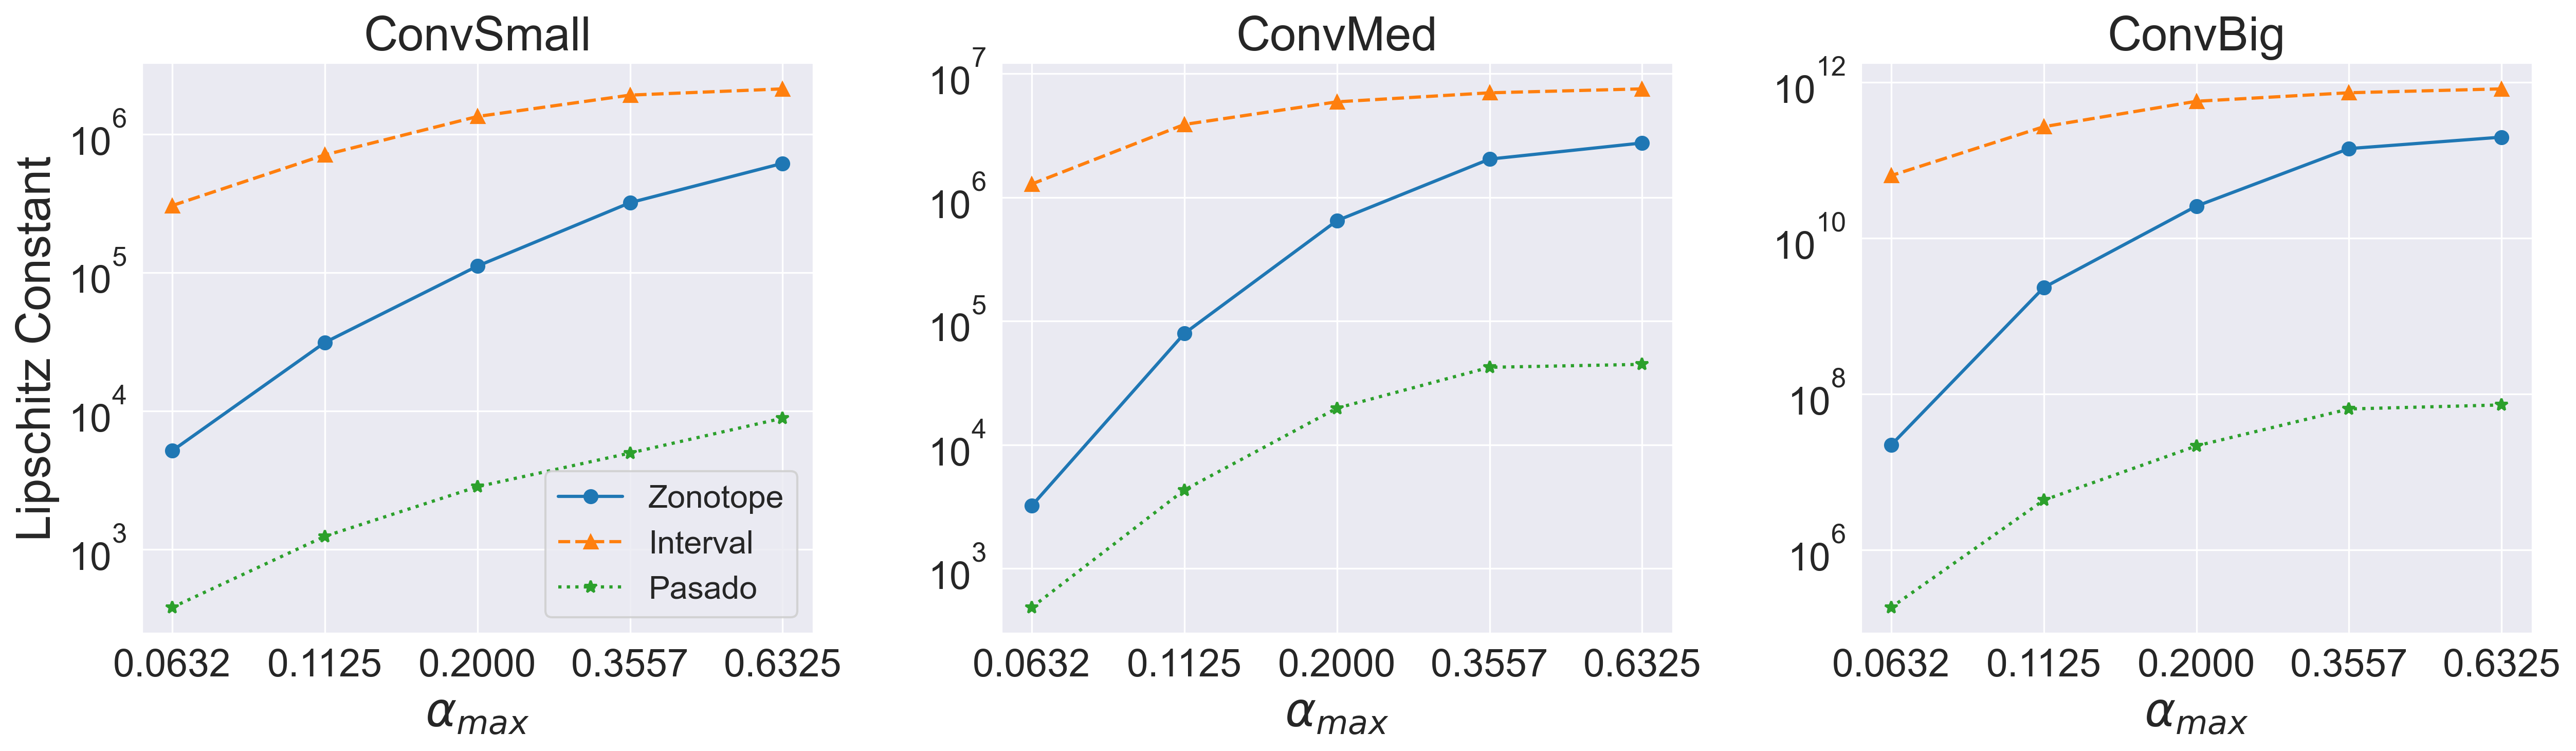

In [4]:
import numpy as np

sns.set_style('darkgrid')

epsilons = [10 ** (-k / 4) * 2 for k in range(2, 7)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4.8), dpi=300)
plt.subplots_adjust(wspace=0.28)

for i, type in enumerate(types):
    lc_zonos = torch.load(f'./results/lc_zonos_conv{type}.pth')
    lc_intervals = torch.load(f'./results/lc_intervals_conv{type}.pth')
    lc_pasados = torch.load(f'./results/lc_pasados_conv{type}.pth')

    print(f'Conv{type.capitalize()} network zono/interval Lipschitz constant difference:',
          max(lc_intervals) - max(lc_zonos))
    print(f'Conv{type.capitalize()} network Pasado/zono Lipschitz constant difference:',
          max(lc_zonos) - max(lc_pasados))
    print()

    axs[i].plot(epsilons, lc_zonos, marker='o', label='Zonotope')
    axs[i].plot(epsilons, lc_intervals, linestyle='--', marker='^', label='Interval')
    axs[i].plot(epsilons, lc_pasados, linestyle=':', marker='*', label='Pasado')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xticks(epsilons)
    axs[i].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axs[i].set_xlabel(r'$\alpha_{max}$')
    axs[i].set_title(f'Conv{type.capitalize()}')

    if i == 0:
        axs[i].legend()
        axs[i].set_ylabel('Lipschitz Constant')

plt.show()

ConvSmall network zono/interval relative precision improvement: 59.314924375721645

ConvMed network zono/interval relative precision improvement: 399.38601530111634

ConvBig network zono/interval relative precision improvement: 2884.0665038172438


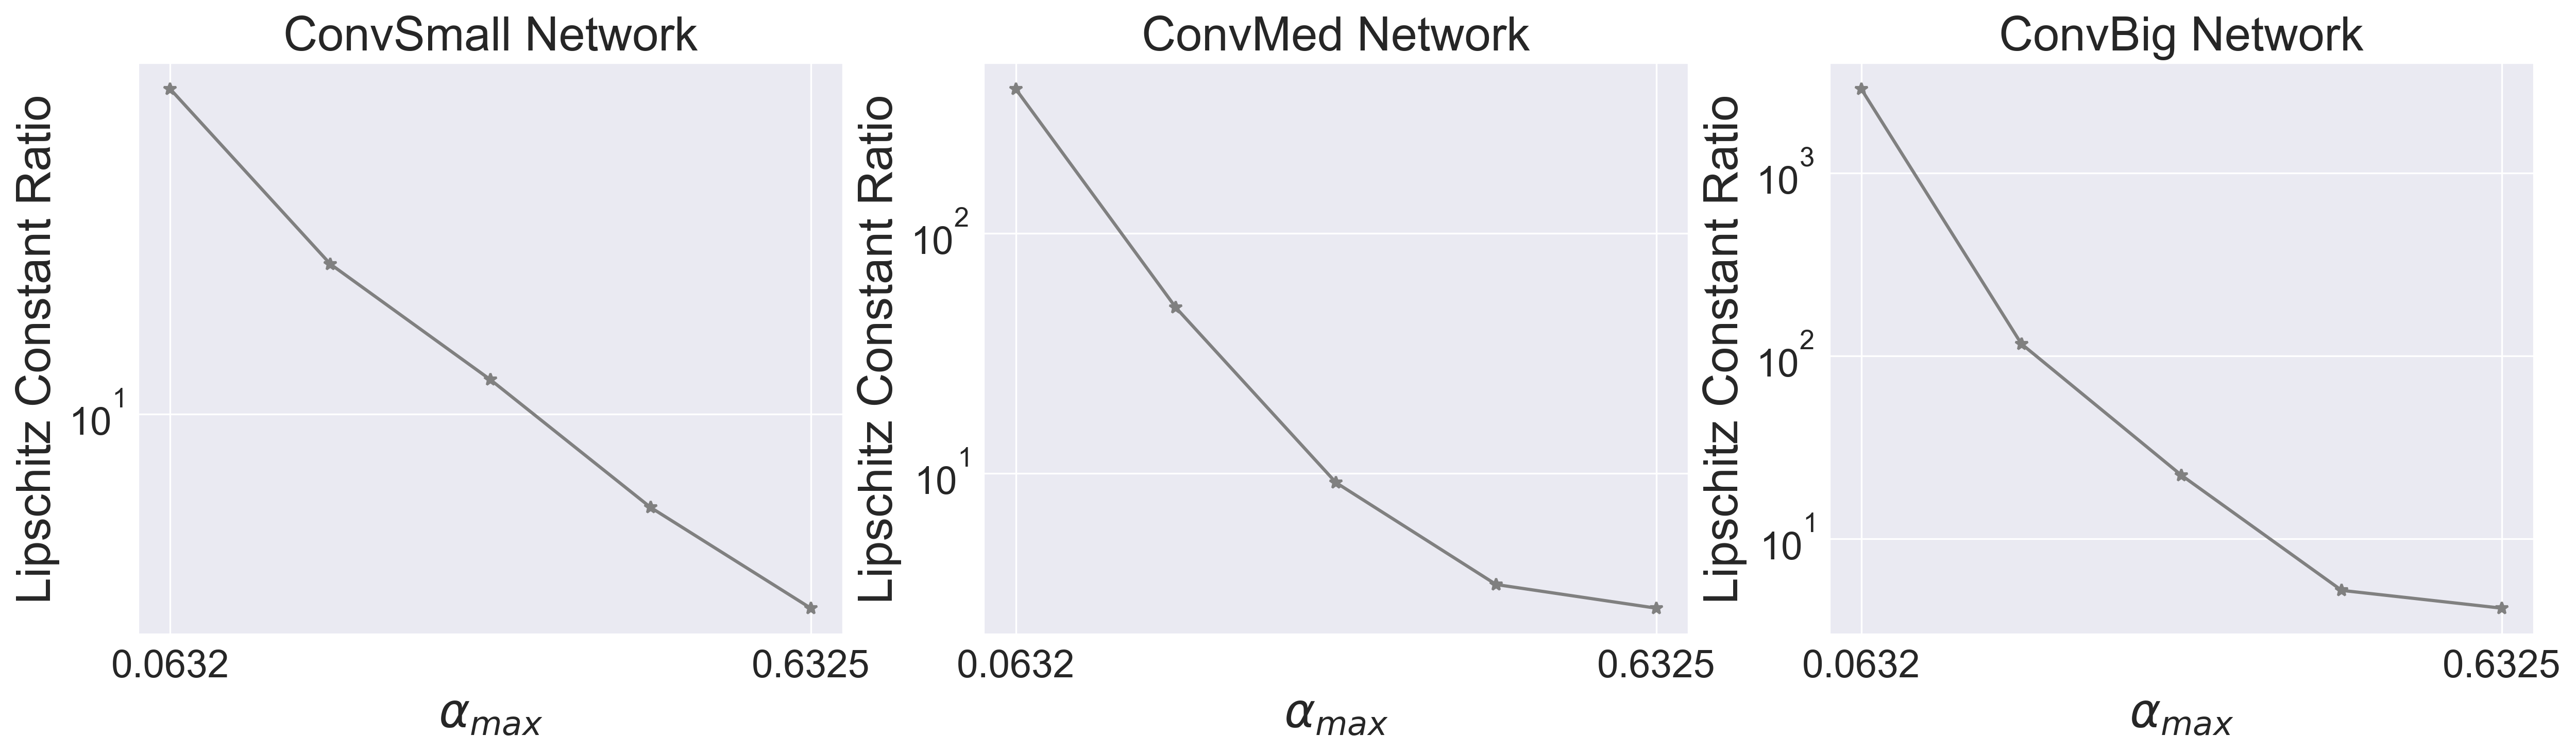

In [5]:
import numpy as np

sns.set_style('darkgrid')

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4.8), dpi=300)

for i, type in enumerate(['small', 'med', 'big']):
    lc_zonos = torch.load(f'./results/lc_zonos_conv{type}.pth')
    lc_intervals = torch.load(f'./results/lc_intervals_conv{type}.pth')
    lc_pasados = torch.load(f'./results/lc_pasados_conv{type}.pth')

    prec = np.array(lc_intervals) / np.array(lc_zonos)
    print(f'Conv{type.capitalize()} network zono/interval relative precision improvement:', max(prec))
    print()

    axs[i].plot(epsilons, prec, marker='*', color='gray')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xticks(epsilons[::4])
    axs[i].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axs[i].set_xlabel(r'$\alpha_{max}$')
    axs[i].set_ylabel('Lipschitz Constant Ratio')
    axs[i].set_title(f'Conv{type.capitalize()} Network')

plt.show()

ConvSmall pasado/zono relative precision improvement: 69.66178733195247

ConvMed pasado/zono relative precision improvement: 61.66660262687303

ConvBig pasado/zono relative precision improvement: 2751.605810552218


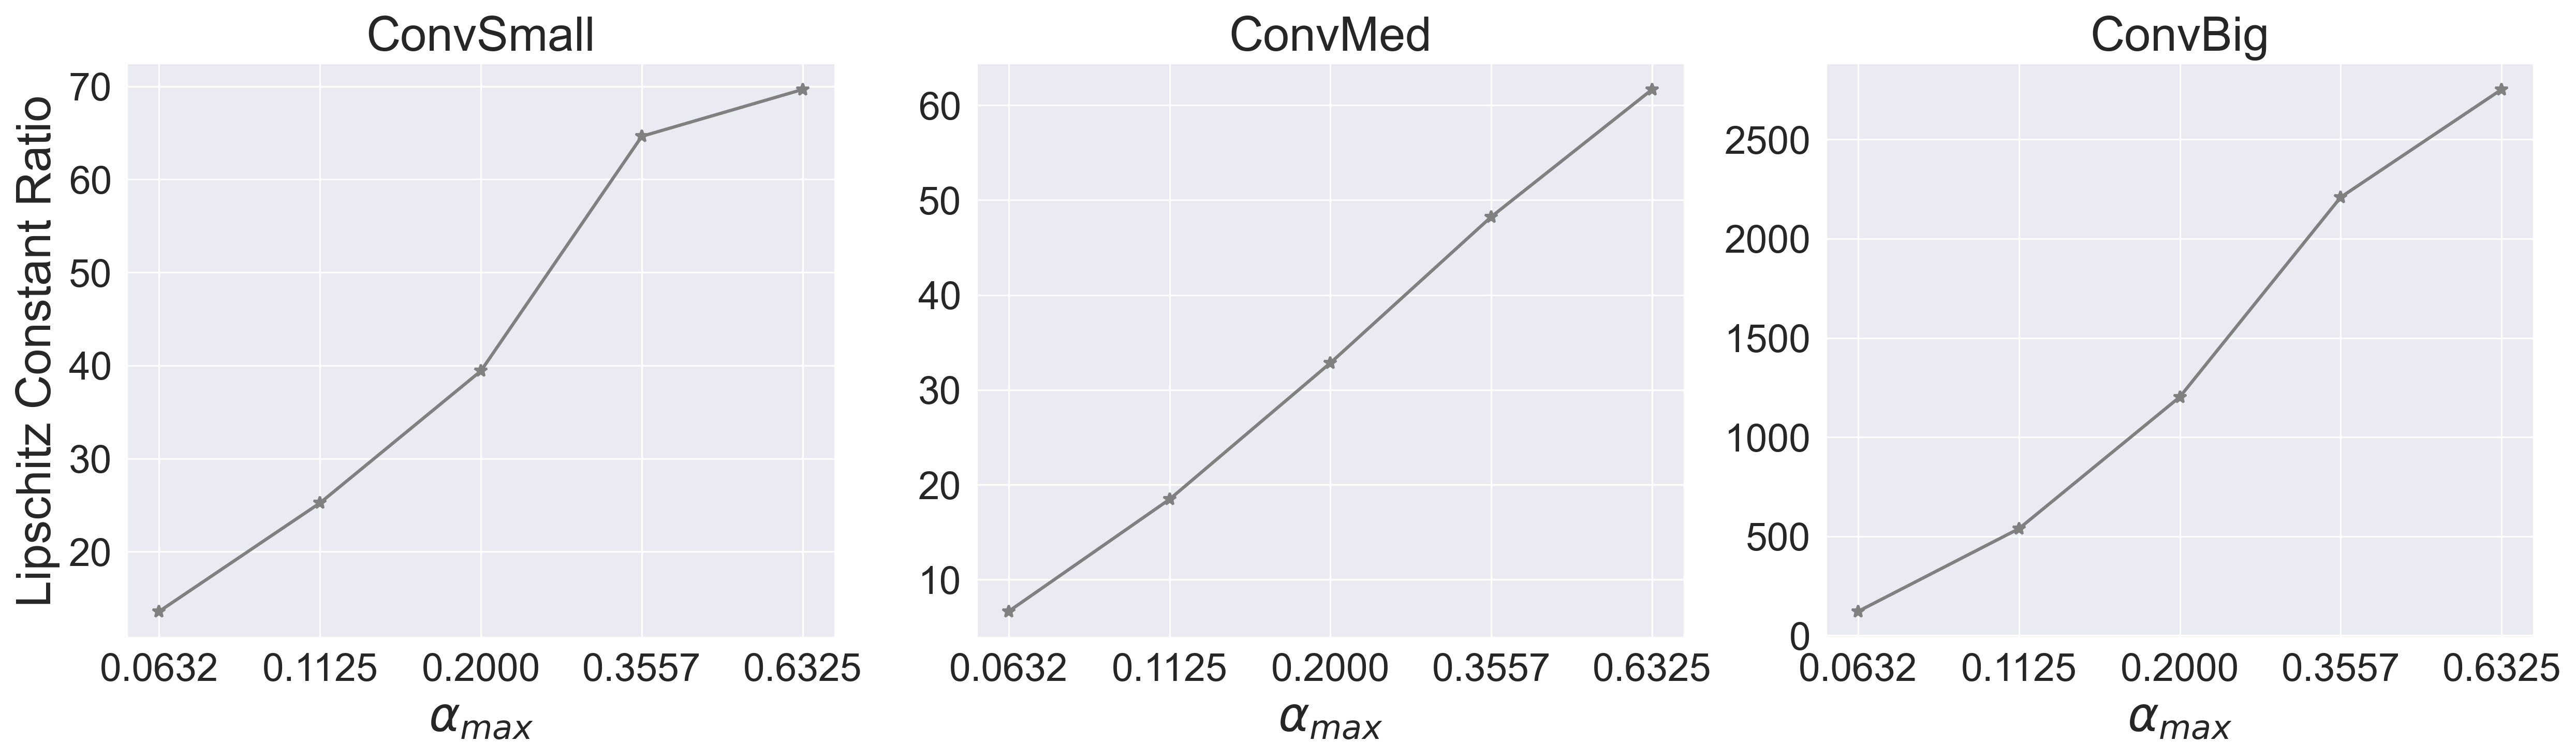

In [6]:
import numpy as np

sns.set_style('darkgrid')

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4.8), dpi=300)
# plt.subplots_adjust(wspace=0.28)

for i, type in enumerate(['small', 'med', 'big']):
    lc_zonos = torch.load(f'./results/lc_zonos_conv{type}.pth')
    lc_intervals = torch.load(f'./results/lc_intervals_conv{type}.pth')
    lc_pasados = torch.load(f'./results/lc_pasados_conv{type}.pth')

    prec = np.array(lc_zonos) / np.array(lc_pasados)
    print(f'Conv{type.capitalize()} pasado/zono relative precision improvement:', max(prec))
    print()

    axs[i].plot(epsilons, prec, marker='*', color='gray')
    axs[i].set_xscale('log')
    axs[i].set_xticks(epsilons)
    axs[i].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axs[i].set_xlabel(r'$\alpha_{max}$')
    axs[i].set_title(f'Conv{type.capitalize()}')

    if i == 0:
        axs[i].set_ylabel('Lipschitz Constant Ratio')

plt.show()